In [40]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [41]:
# Import prospective dataset
df= pd.read_excel('H:/RediMinds/DRMahen/Preethi PN_Data validation_2014-2018.xlsx', sheet_name='PN_Data validation_2014-2018')

In [42]:
# Import prospective dataset
input_path = 'H:\RediMinds\VCQI'
test = pd.read_csv(input_path+"\VCQI_clean_test_30_day_complications.csv")

In [43]:
test = test.merge(df[['PATIENTNUMBER','R.E.N.A.L.NEPHROSCORE', 'PADUASCORE']],left_on='PATIENTNUMBER',right_on='PATIENTNUMBER')

In [44]:
test_renal = test.dropna(subset=['R.E.N.A.L.NEPHROSCORE']).copy()

In [45]:
test_renal['R.E.N.A.L.NEPHROSCORE'].value_counts()

7       44
8       41
9       31
5       25
6       25
10      19
5a      16
7p      15
7a      15
8p      14
4       13
9a      10
5p       9
6a       9
6p       8
8x       8
11       7
10x      7
10p      6
8a       6
4a       5
9p       5
7x       4
9x       4
4p       3
10a      3
4x       2
11x      2
9ph      2
6x       2
11p      2
8ah      1
9xh      1
6xh      1
5x       1
10ah     1
9ah      1
10ph     1
Name: R.E.N.A.L.NEPHROSCORE, dtype: int64

In [46]:
test_renal['RENAL_SCORE'] = test_renal['R.E.N.A.L.NEPHROSCORE'].map(lambda x : int(re.findall(r'\d+', x)[0]))

In [47]:
x = test_renal['RENAL_SCORE'].unique().tolist()

In [48]:
x.sort()#reverse=True)

In [49]:
x

[4, 5, 6, 7, 8, 9, 10, 11]

In [50]:
dict_precision = {}
dict_recall = {}
from sklearn import metrics
for i in x:
    test_renal['Pred'] = test_renal['RENAL_SCORE'].apply(lambda y: 1 if y>=i else 0)
    #print(i, metrics.confusion_matrix(test['INTRA_OP_COMPLICATIONS'], test['Pred']))
    dict_precision.update({i:metrics.precision_score(test_renal['POSTOP_COMPLICATIONS'], test_renal['Pred'])})
    dict_recall.update({i:metrics.recall_score(test_renal['POSTOP_COMPLICATIONS'], test_renal['Pred'])})

In [51]:
dict_precision

{4: 0.21951219512195122,
 5: 0.22254335260115607,
 6: 0.22372881355932203,
 7: 0.24,
 8: 0.22093023255813954,
 9: 0.22549019607843138,
 10: 0.20833333333333334,
 11: 0.2727272727272727}

In [52]:
dict_recall

{4: 1.0,
 5: 0.9506172839506173,
 6: 0.8148148148148148,
 7: 0.7407407407407407,
 8: 0.4691358024691358,
 9: 0.2839506172839506,
 10: 0.12345679012345678,
 11: 0.037037037037037035}

In [53]:
metrics.auc(list(dict_recall.values()),list(dict_precision.values()))

0.21792278130011383

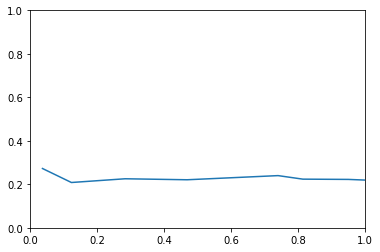

In [54]:
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(list(dict_recall.values()),list(dict_precision.values()))

### Calculate AUC-PR for PADUA Score

In [55]:
test_padua = test.dropna(subset=['PADUASCORE']).copy()

In [56]:
test_padua['PADUASCORE'].value_counts()

7.0     95
9.0     62
8.0     62
10.0    58
11.0    41
6.0     38
12.0    24
13.0     3
5.0      1
Name: PADUASCORE, dtype: int64

In [57]:
x = test_padua['PADUASCORE'].unique().tolist()

In [58]:
x.sort(reverse=True)

In [59]:
x

[13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0]

In [60]:
dict_precision = {}
dict_recall = {}
from sklearn import metrics
for i in x:
    test_renal['Pred'] = test_renal['PADUASCORE'].apply(lambda y: 1 if y>=i else 0)
    #print(i, metrics.confusion_matrix(test['INTRA_OP_COMPLICATIONS'], test['Pred']))
    dict_precision.update({i:metrics.precision_score(test_renal['POSTOP_COMPLICATIONS'], test_renal['Pred'])})
    dict_recall.update({i:metrics.recall_score(test_renal['POSTOP_COMPLICATIONS'], test_renal['Pred'])})

In [61]:
dict_precision

{13.0: 0.0,
 12.0: 0.15384615384615385,
 11.0: 0.2537313432835821,
 10.0: 0.27049180327868855,
 9.0: 0.24175824175824176,
 8.0: 0.23045267489711935,
 7.0: 0.22054380664652568,
 6.0: 0.2191780821917808,
 5.0: 0.22131147540983606}

In [62]:
dict_recall

{13.0: 0.0,
 12.0: 0.04938271604938271,
 11.0: 0.20987654320987653,
 10.0: 0.4074074074074074,
 9.0: 0.5432098765432098,
 8.0: 0.691358024691358,
 7.0: 0.9012345679012346,
 6.0: 0.9876543209876543,
 5.0: 1.0}

In [63]:
metrics.auc(list(dict_recall.values()),list(dict_precision.values()))

0.22708782027191238

In [64]:
import matplotlib.pyplot as plt

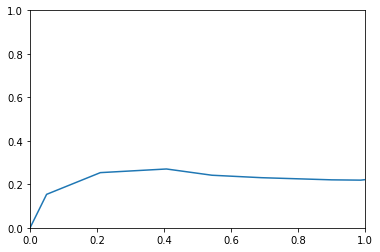

In [65]:
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(list(dict_recall.values()),list(dict_precision.values()))